# Implementation exercise: Linear Classification

In [187]:
import numpy as np
import math
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline  

### Some helper functions for visualisation

In [188]:
def plot_decision_boundary(X, Z, W=None, b=None):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(X[:,0], X[:,1], c=Z, cmap=plt.cm.cool)
    ax.set_autoscale_on(False)

    a = - W[0, 0] / W[0, 1]
    xx = np.linspace(-30, 30)
    yy = a * xx - (b[0]) / W[0, 1]

    ax.plot(xx, yy, 'k-', c=plt.cm.cool(1.0/3.0))

### Dataset Loader

In [189]:
def loadDataset(split, X=[] , XT=[], Z = [], ZT = []):
    dataset = datasets.load_iris()
    c = list(zip(dataset['data'], dataset['target']))
    np.random.seed(224)
    np.random.shuffle(c)
    x, t = zip(*c)
    sp = int(split*len(c))
    X = x[:sp]
    XT = x[sp:]
    Z = t[:sp]
    ZT = t[sp:]
    names = ['Sepal. length', 'Sepal. width', 'Petal. length', 'Petal. width']
    return np.array(X), np.array(XT), np.array(Z), np.array(ZT), names

In [190]:
# prepare data
split = 0.67
X, XT, Z, ZT, names = loadDataset(split)

# combine two of the 3 classes for a 2 class problem
Z[Z==2] = 1
ZT[ZT==2] = 1

# only look at 2 dimensions of the input data for easy visualisation
X = X[:,:2]
XT = XT[:,:2]

## Sigmoid Function

In [191]:
def sigmoid(Y):
    Prob = np.zeros(Y.size);
    YNew = np.zeros(Y.size);
    for i in range(Y.size):
            Prob[i] = 1/(1+np.exp(-Y[0,i]));
    _
    return Prob;

## Exercise 1: Calculate probability of class 1
Compute the probability of class 1 given the data and the parameters.

arguments:
* *X*: data
* *W*: weight matrix, part of the parameters
* *b*: bias, part of the parameters

returns:
* *rate*: probabiliy of the predicted class 1

In [192]:
def pred(X, W, b):
    B = np.ones(np.size(X,0))*b;
    Y = W*(np.matrix(X).transpose()) + B;
    Probability = sigmoid(Y);
    return Probability;

## Exercise 2: Calculate the log-likelihood given the target
Compute the logarithm of the likelihood for logistic regression. The negative log-likelihood is our loss function.

arguments:
* *X*: data
* *Z*: target
* *W*: weight matrix, part of the parameters
* *b*: bias, part of the parameters

returns:
* *log likelihood*: logarithm of the likelihood

In [193]:
def loglikelihood(X, Z, W, b):
    P_C1 = pred(X, W, b);
    P_C2 = 1 - P_C1;
    Z_inv = 1-Z;
    L_L = Z*(np.log(P_C1)) + (Z_inv)*(np.log(P_C2));
    likelihood = np.sum(L_L);
    print("sizeforL_L : ", L_L.shape)
    return L_L;

In [194]:
def loglikelihood_S(X, Z, W, b):
    llh = np.zeros(Z.size)
    Y = pred(X,W,b)
    for i in range(len(Z)):
        llh[i] = Z[i]*(np.log(Y[i])) + (1-Z[i])*(np.log(1-Y[i]));
        '''if Z[i]==1:
            llh[i] = np.log(Y[i])
        else:
            llh[i] = np.log(1-Y[i])'''
    return llh

## Exercise 3: Implement the gradient of the loss/log-likelihood
Compute the gradient of the loss with respect to the parameters

arguments:
* *X*: data
* *Z*: target
* *W*: weight matrix, part of the parameters
* *b*: bias, part of the parameters

returns:
* *dLdW*: gradient of loss wrt to W
* *dLdb*: gradient of loss wrt to b

In [195]:
def grad(X, Z, W, b):
    Y = pred(X,W,b);
    diff = Y - Z;
    grad_w = diff*(np.matrix(X));
    grad_b = np.sum(diff);   
    
    return grad_w, grad_b

## Exercise 4: Test everything
Run the provied simple gradient descent algorithm to optimize the model parameters and plot the resuling decision boundary.

[-0.00308402]
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)
sizeforL_L :  (100,)

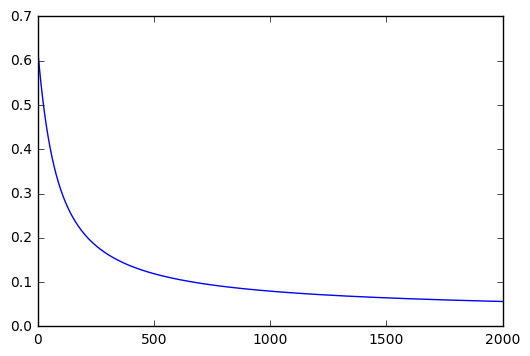

In [196]:
W = np.random.randn(1,2) * 0.01
b = np.random.randn(1) * 0.01

print (b);

learning_rate = 0.001
train_loss = []
validation_loss = []

for i in range(2000):
    dLdW, dLdb = grad(X, Z, W, b)
    W -= learning_rate * dLdW;
    b -= learning_rate * dLdb;
    train_loss.append( - loglikelihood(X, Z, W, b).mean());

_ = plt.plot(train_loss);

### Decision boundary on the training set

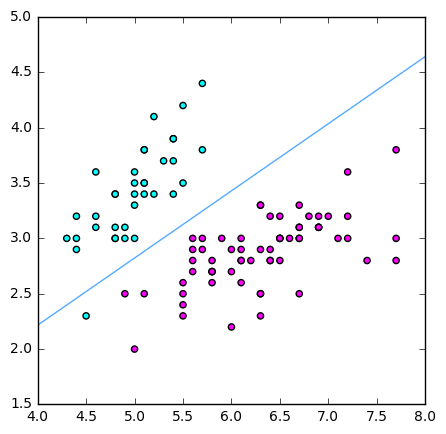

In [197]:
plot_decision_boundary(X, Z, W=W, b=b)

### Decision boundary on the test set

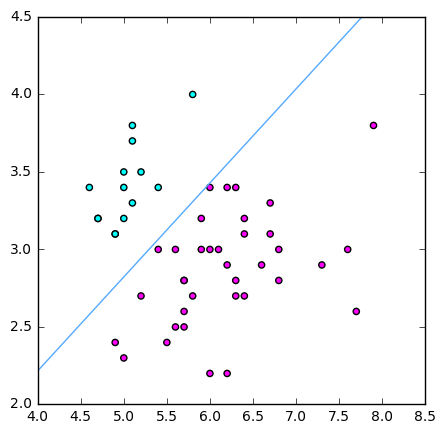

In [198]:
plot_decision_boundary(XT, ZT, W=W, b=b)

In [199]:
predic = pred(X,W,b);
i=0;
#print(predic)
#print(Z)
#print(Z*predic)
#print(np.log(predic))
#print(Z*(np.log(predic)))

#print(np.log(1-predic))
#print((1-Z)*(np.log(1-predic)))
L_L = loglikelihood_N(X, Z, W, b)
print("L_L : ",L_L)

L_L_S = loglikelihood(X, Z, W, b)
print("L_L_S : ",L_L_S)





#print(np.exp(Y[0,0]));

sizeforL_L :  (100,)
L_L :  [ -3.35849583e-02  -5.43036902e-03  -1.21690200e-01  -3.80135191e-02
  -1.96892290e-03  -8.76849716e-03  -1.07561223e-02  -1.58437257e-02
  -2.50160411e-02  -2.41328187e-02  -8.54256661e-04  -1.31745924e-02
  -1.57295175e+00  -8.94024806e-03  -8.74422573e-04  -3.69465047e-03
  -6.08607002e-03  -1.13562469e-02  -3.60297994e-02  -2.91568597e-01
  -1.13562469e-02  -4.86382524e-03  -5.27607160e-02  -2.41328187e-02
  -5.98672484e-02  -4.17173605e-02  -1.39485700e-01  -1.41392291e-03
  -1.18048570e-02  -3.69465047e-03  -6.06270464e-03  -1.41984510e-02
  -1.26742585e-02  -4.99641255e-02  -2.56840939e-04  -3.28226689e-02
  -2.28651862e-02  -1.47020953e-02  -1.12943928e-03  -6.42647170e-03
  -8.57557539e-04  -2.28651862e-02  -3.94946156e-02  -4.35625962e-03
  -1.01746006e-02  -4.09286587e-02  -1.49624164e-01  -1.19476945e-01
  -4.77019964e-03  -2.24289056e-02  -1.15783920e-02  -1.34124953e-04
  -5.45954689e-02  -8.63313357e-03  -3.87471274e-02  -2.89901030e-02
  -1.3

In [200]:
B = np.ones(Z.size)
B = 3*B
print(B)
print(1-Z);
print(Z*B);
print(predic);
print(predic-Z);
print((predic-Z)*((X)))

[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
[1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[ 0.  3.  0.  3.  0.  3.  0.  0.  0.  3.  3.  3.  0.  3.  0.  0.  0.  3.
  0.  0.  3.  3.  0.  3.  0.  0.  3.  0.  3.  0.  3.  0.  3.  3.  3.  3.
  0.  3.  3.  3.  0.  0.  3.  3.  3.  0.  0.  0.  3.  0.  3.  3.  3.  0.
  3.  0.  0.  3.  3.  0.  3.  3.  3.  0.  3.  3.  0.  3.  3.  3.  3.  3.
  0.  3.  3.  3.  0.  3.  3.  3.  3.  3.  3.  0.  3.  0.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.

ValueError: operands could not be broadcast together with shapes (100,) (100,2) 